## 22<sup>nd</sup> of April, 2020
## Benjamin Adam Catching
## Coronavirus Simulations
## Andino Lab

Large-scale simulations ran last night, hopefully all were successful. A brief glance at one of the simulation outputs shows that the simulation ran to completion and none of the error files have any entries. Using the code from yesterday the simulations are briefly analyzed.  


Random number seeds:  
42 1137 2718 23 39 99 415 1425 612 3038

In [1]:
# Import python packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.ticker as ticker

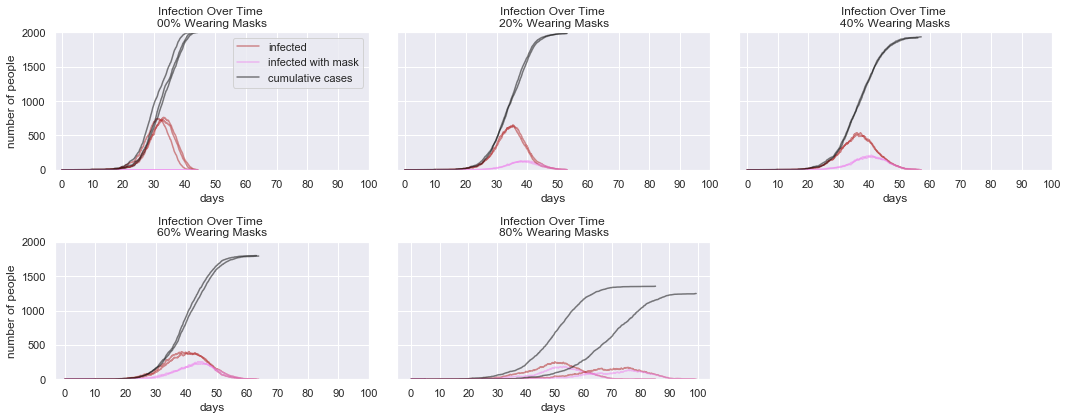

In [7]:
sns.set()
fig, ax = plt.subplots(2, 3, figsize=(15, 6), sharey=True)
for g in range(3):
    for h in range(5):
        # Name the datafile
        run_name = 'mask_per_' + str(h * 2) + '0_shelter_' + str(i) + '0_iter_' + str(g)
        dataname = '../../data/large_run/' + run_name + '.csv'
        temp_df = pd.read_csv(dataname, header=1)
        if h > 2:
            _ = ax[1,h-3].plot(temp_df['time'], temp_df['infected'], 
                     color='firebrick', label='infected', alpha=.5)
            _ = ax[1,h-3].plot(temp_df['time'], temp_df['infected with mask'], 
                     color='violet', label='infected with mask', alpha=.5)
            _ = ax[1,h-3].plot(temp_df['time'], temp_df['infected symptomatic'] +
                               temp_df['recovered'], color='black', 
                               label='cumulative cases', alpha=.5)
        
            _ = ax[1,h-3].set_xlabel('days')
            _ = ax[1,h-3].set_title(f'Infection Over Time \n'+
                        f'{h*2}0% Wearing Masks')
            _ = ax[1, h-3].set_xticks(np.linspace(0, 2400, 11))
            _ = ax[1, h-3].set_xticklabels([int(x) for x in np.linspace(0, 100, 11)])
            _ = ax[1, h-3].set_ylim([0, 2000])
        else:
            _ = ax[0, h].plot(temp_df['time'], temp_df['infected'], 
                         color='firebrick', label='infected', alpha=.5)
            _ = ax[0, h].plot(temp_df['time'], temp_df['infected with mask'], 
                         color='violet', label='infected with mask', alpha=.5)
            _ = ax[0, h].plot(temp_df['time'], temp_df['infected symptomatic'] +
                               temp_df['recovered'], color='black', 
                               label='cumulative cases', alpha=.5)
            _ = ax[0, h].set_xlabel('days')
            _ = ax[0, h].set_title(f'Infection Over Time \n'+
                            f'{h*2}0% Wearing Masks')
            _ = ax[0, h].set_xticks(np.linspace(0, 2400, 11))
            _ = ax[0, h].set_xticklabels([int(x) for x in np.linspace(0, 100, 11)])
            _ = ax[0, h].set_ylim([0, 2000])
        if g == 0:
            if h == 0:
                _ = ax[0, 0].legend()
            if h == 0:
                _ = ax[0, h].set_ylabel('number of people')
            if h == 3:
                _ = ax[1, h-3].set_ylabel('number of people')
fig.delaxes(ax[1, 2])
fig.tight_layout()
plt.savefig('../../large_mask_triplicate.png', dpi=100)
plt.show()

In [252]:
# Function to find the day with half the number of cumulative infections
def half_infected(df):
    """
    From the dataframe of infection dynamics find infection halfway point
    """
    
    # Define the number of time points
    timepoints = len(df[['time']])
    # Get the cumulative infection time points
    c_infect = df['recovered'] + df['infected']
    all_infected = df[['infected']].values
    # Get the max number of infected
    max_infect = df['recovered'].values.max()
    # Get the final number of infected
    final_infect = c_infect.max()
    half_max = max_infect / 2
    # Iterate over time points
    for i, infected in enumerate(c_infect):
        if infected == half_max:
            peak_infect = all_infected[i]
            return [i, final_infect, peak_infect]
        if infected < half_max:
            if c_infect[i + 1] > half_max:
                peak_infect = all_infected[i]
                return [i, final_infect, peak_infect]

In [10]:
half_max_time = np.zeros((5, 3))
half_max_num = np.zeros((5, 3))
max_num = np.zeros((5, 3))
for h in range(5):
    for g in range(3):
        # Name the datafile
        run_name = 'mask_per_' + str(h * 2) + '0_iter_' + str(g)
        dataname = '../../data/large_run/' + run_name + '.csv'
        temp_df = pd.read_csv(dataname, header=1)
        test_half_max = half_infected(temp_df)
        half_max_time[h, g] = test_half_max[0]
        half_max_num[h, g] = test_half_max[1]
        max_num[h, g] = test_half_max[2]
max_num

array([[2.000e+03, 2.000e+03, 2.000e+03],
       [1.988e+03, 1.984e+03, 2.000e+00],
       [1.919e+03, 1.934e+03, 2.000e+00],
       [1.800e+03, 1.793e+03, 2.000e+00],
       [1.355e+03, 1.248e+03, 1.000e+00]])

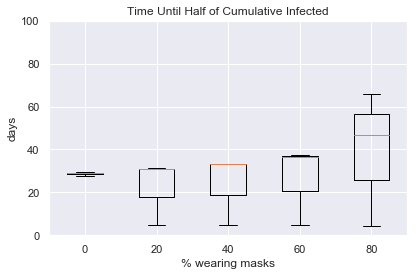

In [12]:
_ = plt.boxplot(half_max_time.transpose() / 24)
_ = plt.xticks([1, 2, 3, 4, 5], [0, 20, 40, 60, 80])
_ = plt.xlabel('% wearing masks')
_ = plt.ylabel('days')
_ = plt.title('Time Until Half of Cumulative Infected')
_ = plt.ylim((0, 100))
_ = plt.tight_layout()
plt.show()

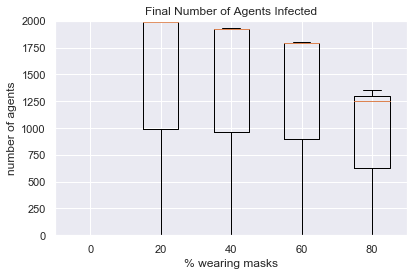

In [14]:
_ = plt.boxplot(max_num.transpose())
_ = plt.xticks([1, 2, 3, 4, 5], [0, 20, 40, 60, 80])
_ = plt.xlabel('% wearing masks')
_ = plt.ylabel('number of agents')
_ = plt.title('Final Number of Agents Infected')
_ = plt.ylim((0, 2000))
_ = plt.tight_layout()
plt.show()

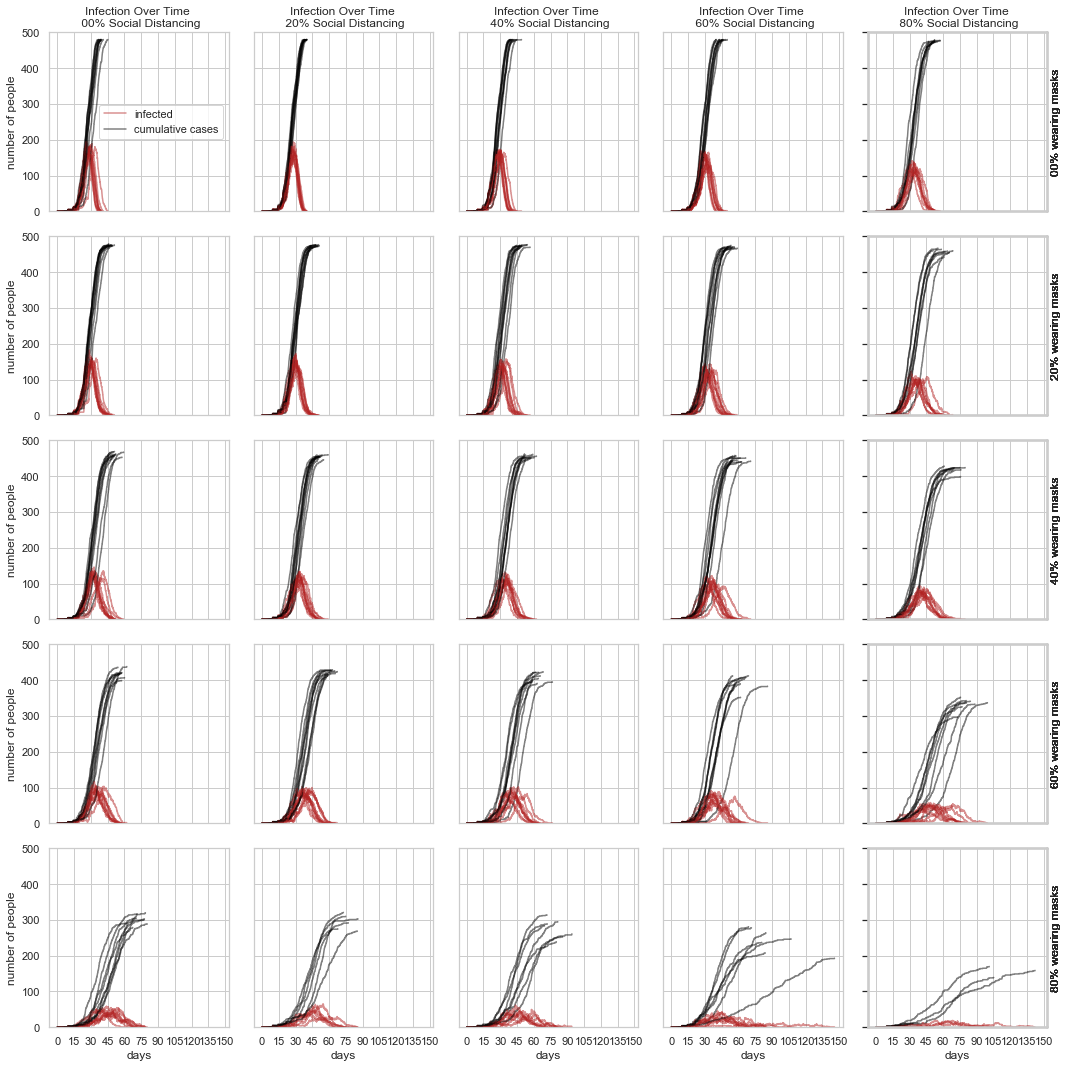

In [219]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharey=True, sharex=True)
    for g in range(10):
        for h in range(5):
            for i in range(5):
                run_name = 'mask_per_' + str(h * 2) + '0_shelter_' + str(i * 2) + '0_iter_' + str(g)
                dataname = '../../data/server_run/' + run_name + '.csv'
                temp_df = pd.read_csv(dataname, header=1)
                #print(temp_df.iloc[-1, :].values)
                if h == 4:
                    _ = ax[h, i].set_xlabel('days')
                    _ = ax[h, i].plot(temp_df['time'], temp_df['infected'], 
                         color='firebrick', alpha=.5)
                    """_ = ax[h, i].plot(temp_df['time'], temp_df['infected with mask'], 
                             color='violet', alpha=.5)"""
                    _ = ax[h, i].plot(temp_df['time'], temp_df['infected symptomatic'] +
                                       temp_df['recovered'], color='black', 
                                       alpha=.5)
                elif h == 0:
                    _ = ax[h, i].set_title(f'Infection Over Time \n {i*2}0% Social Distancing')
                    if i == 0 and g == 0:
                        _ = ax[h, i].plot(temp_df['time'], temp_df['infected'], 
                                          color='firebrick', label='infected', alpha=.5)
                        """_ = ax[h, i].plot(temp_df['time'], temp_df['infected with mask'], 
                                          color='violet', label='infected with mask', alpha=.5)"""
                        _ = ax[h, i].plot(temp_df['time'], temp_df['infected symptomatic'] +
                                           temp_df['recovered'], color='black', 
                                           label='cumulative cases', alpha=.5)
                        _ = ax[h, i].set_xticks(np.linspace(0, 3600, 11))
                        _ = ax[h, i].set_xticklabels([int(x) for x in np.linspace(0, 150, 11)])
                        _ = ax[h, i].set_ylim([0, 500])
                        _ = ax[0, 0].legend()
                    else:
                        _ = ax[h, i].plot(temp_df['time'], temp_df['infected'], 
                                          color='firebrick', alpha=.5)
                        """_ = ax[h, i].plot(temp_df['time'], temp_df['infected with mask'], 
                                          color='violet', alpha=.5)"""
                        _ = ax[h, i].plot(temp_df['time'], temp_df['infected symptomatic'] +
                                          temp_df['recovered'], color='black', 
                                          alpha=.5)

                else:
                    _ = ax[h, i].plot(temp_df['time'], temp_df['infected'], 
                         color='firebrick', alpha=.5)
                    """_ = ax[h, i].plot(temp_df['time'], temp_df['infected with mask'], 
                             color='violet', alpha=.5)"""
                    _ = ax[h, i].plot(temp_df['time'], temp_df['infected symptomatic'] +
                                       temp_df['recovered'], color='black', 
                                       alpha=.5)
                if h == 0:
                    _ = ax[i, h].set_ylabel('number of people')

                if h == 4:
                    ax2 = ax[i, h].twinx()
                    ax2.set_ylabel(f'{i*2}0% wearing masks')
                    ax2.set_yticks([])
    fig.tight_layout()
    plt.savefig('../../large_mask_triplicate.png', dpi=100)
    plt.show()

In [305]:
half_max_time = np.zeros((5, 5, 10))
max_num = np.zeros((5, 5, 10))
peak_num = np.zeros((5, 5, 10))
no_spread = np.zeros((5, 5, 10))
for i in range(5):
    for h in range(5):
        for g in range(10):
            # Name the datafile
            run_name = 'mask_per_' + str(h * 2) + '0_shelter_' + str(i * 2) + '0_iter_' + str(g)
            dataname = '../../data/server_run/' + run_name + '.csv'
            temp_df = pd.read_csv(dataname, header=1)
            test_half_max = half_infected(temp_df)
            half_max_time[h, i, g] = test_half_max[0] / 24
            max_num[h, i, g] = test_half_max[2]
            peak_num[h, i, g] = test_half_max[1]
            if test_half_max[2] <= 15:
                no_spread[h, i, g] = 1
print(peak_num)

[[[236. 240. 240. 239. 239. 240. 240. 240. 240. 240.]
  [240. 240. 237. 239. 239. 239. 238. 240. 239. 239.]
  [237. 239. 238. 234. 238. 237. 240. 240. 240. 235.]
  [240. 237. 240. 239. 240. 239. 239. 237. 240. 239.]
  [236. 237. 239. 237. 237.   0.   1. 237. 236. 239.]]

 [[237. 236. 238. 235. 237. 237. 235. 237. 235. 237.]
  [238. 237. 237. 232. 236. 235. 235. 233. 238. 236.]
  [235. 229. 237. 238. 237. 234. 238. 234. 232. 235.]
  [236. 233. 234. 234. 233. 233. 229. 235. 232. 235.]
  [228. 229. 227. 221. 232.   0.   1. 232. 230. 229.]]

 [[228. 229. 234. 228. 229. 234. 232. 231. 227. 226.]
  [227. 223. 226. 227. 227. 228. 229. 229. 227. 225.]
  [  1. 230. 226. 224. 222. 229. 228. 225. 228. 226.]
  [220. 221. 225. 221. 220. 229. 228. 227. 218. 224.]
  [210. 208. 198. 212. 208.   0.   1. 214. 210. 212.]]

 [[203. 209. 208. 208. 198. 206.   0. 217. 209. 218.]
  [206. 208. 211. 214. 208. 209. 212. 212. 211. 212.]
  [  1. 205. 198. 197. 195. 210. 201. 197. 211. 208.]
  [  3. 204. 192. 191.

[[480 480 479 479 305]
 [475 473 473 469 293]
 [461 455 369 448 268]
 [339 422 329 319 213]
 [192 106 135 119  15]]
[[239 239 237 239 151]
 [236 235 234 233 146]
 [229 226 183 223 133]
 [168 210 164 159 106]
 [ 95  53  67  59   7]]


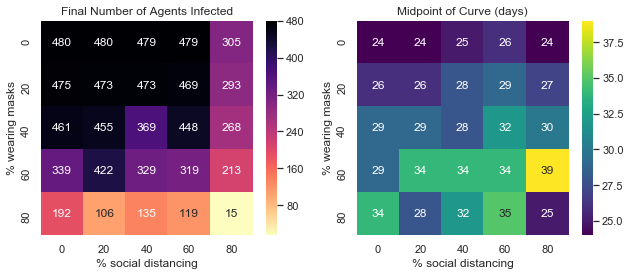

In [312]:
"""half_max_time = np.zeros((5, 5, 10))
max_num = np.zeros((5, 5, 10))
peak_num = np.zeros((5, 5, 10))"""
half_max_time_mean = np.zeros((5, 5))
max_num_mean = np.zeros((5, 5))
peak_num_mean = np.zeros((5, 5))
no_spread_sum = np.zeros((5, 5))
for h in range(5):
    for i in range(5):
        temp = no_spread[h, i].sum()
        no_spread_sum[h, i] = temp
        # Weight of infections with spread
        weight = (10 - temp) / 10
        max_num_mean[h, i] = max_num[h, i].mean() * weight
        half_max_time_mean[h, i] = half_max_time[h, i].mean()
        peak_num_mean[h, i] = peak_num[h, i].mean() * weight
max_num_mean = max_num_mean.astype(int)
half_max_time_mean = half_max_time_mean.astype(int)
peak_num_mean = peak_num_mean.astype(int)
print(max_num_mean)
print(peak_num_mean)
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.heatmap(max_num_mean, fmt="d", cmap='magma_r', annot=True, ax=ax[0])
    _ = ax[0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_ylabel('% wearing masks')
    _ = ax[0].set_xlabel('% social distancing')
    _ = ax[0].set_title('Final Number of Agents Infected')
    
    sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1])
    _ = ax[1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_ylabel('% wearing masks')
    _ = ax[1].set_xlabel('% social distancing')
    _ = ax[1].set_title('Midpoint of Curve (days)')
    plt.tight_layout()
    plt.savefig('../../Total_infected.png', dpi=100)
    plt.show()

In [313]:
# Statistical significance of reducing number infected by social distancing 80%
scipy.stats.ttest_ind(max_num[0, 0], max_num[0, 4])

Ttest_indResult(statistic=1.5552146928180544, pvalue=0.13730163556909342)

In [314]:
# Statistical significance of reducing spread midpoint by social distancing 80%
scipy.stats.ttest_ind(half_max_time[0, 0], half_max_time[0, 4])

Ttest_indResult(statistic=-0.00951447253048157, pvalue=0.9925133231954126)

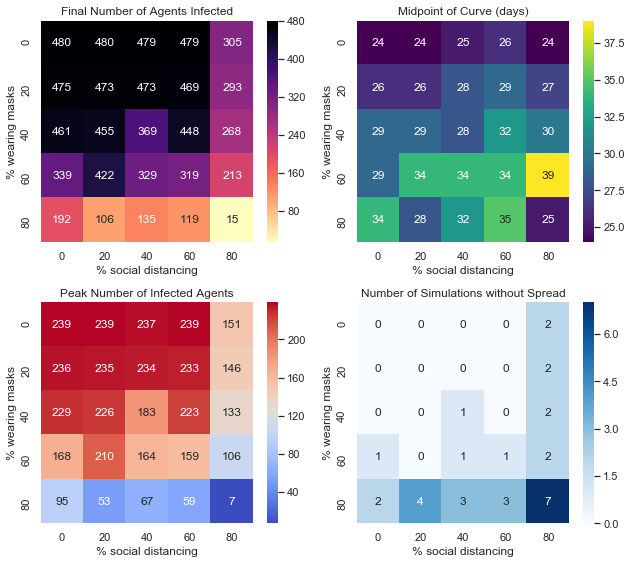

In [315]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(2, 2, figsize=(9, 8))
    sns.heatmap(max_num_mean, fmt="d", cmap='magma_r', annot=True, ax=ax[0, 0])
    _ = ax[0, 0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0, 0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0, 0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0, 0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0, 0].set_ylabel('% wearing masks')
    _ = ax[0, 0].set_xlabel('% social distancing')
    _ = ax[0, 0].set_title('Final Number of Agents Infected')
    
    sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[0, 1])
    _ = ax[0, 1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0, 1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0, 1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0, 1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0, 1].set_ylabel('% wearing masks')
    _ = ax[0, 1].set_xlabel('% social distancing')
    _ = ax[0, 1].set_title('Midpoint of Curve (days)')
    
    sns.heatmap(peak_num_mean, fmt="d", cmap='coolwarm', annot=True, ax=ax[1, 0])
    _ = ax[1, 0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1, 0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1, 0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1, 0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1, 0].set_ylabel('% wearing masks')
    _ = ax[1, 0].set_xlabel('% social distancing')
    _ = ax[1, 0].set_title('Peak Number of Infected Agents')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    sns.heatmap(no_spread_sum, cmap='Blues', annot=True, ax=ax[1, 1])
    _ = ax[1, 1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1, 1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1, 1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1, 1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1, 1].set_ylabel('% wearing masks')
    _ = ax[1, 1].set_xlabel('% social distancing')
    _ = ax[1, 1].set_title('Number of Simulations without Spread')
    plt.tight_layout()
    plt.savefig('../../Summary_values.png', dpi=100)
    plt.show()

In [316]:
print(half_max_time[0, 0].mean())
print(half_max_time[0, 0].std())
print(half_max_time[0, 4].mean())
print(half_max_time[0, 4].std())

24.870833333333334
1.8571792006517125
24.904166666666665
10.344920418844325


In [317]:
print(peak_num_mean[0, 0].mean())
print(peak_num_mean[0, 0].std())
print(peak_num_mean[4, 0].mean())
print(peak_num_mean[4, 0].std())

239.0
0.0
95.0
0.0


In [258]:
dataname

'../../data/server_run/mask_per_80_shelter_80_iter_9.csv'

In [296]:
# Read in data to make a new testfile
f = open(dataname, 'r')
g = open('../../test_elong.csv', 'w')
all_lines = f.readlines()
print(all_lines[0])
for line in all_lines:
    g.write(line)
f.close()
g.close()

# Data from simulation of 500 agents with various levels of sheltering or mask usage



In [297]:
g = open('../../test_elong.csv', 'r')
test_lines = g.readlines()
g.close()
print(test_lines[-1])
last_num = int(test_lines[-1].split(',')[0])
rest_values = ','.join(test_lines[-1].split(',')[1:])
print(last_num)
print(rest_values)
num_steps = 150*24 - last_num + 1
print(num_steps)
rest_steps = np.linspace(last_num, 150*24, num_steps).astype(int)
print(rest_steps[:10])
print(str(last_num+1) + ',' + rest_values)
    
g = open('../../test_elong.csv', 'w+')
for line in test_lines:
    g.write(line)
for x in rest_steps:
    temp = str(x) + ',' + rest_values
    g.write(temp)
g.close()

927,0.8,0.8,0,0,12,0,364,0,0

927
0.8,0.8,0,0,12,0,364,0,0

2674
[927 928 929 930 931 932 933 934 935 936]
928,0.8,0.8,0,0,12,0,364,0,0

